# Лабораторная работа №5 "Численное интегрирование"

In [351]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.integrate as intgr

## Задача 5.1

Вычислить значение интеграла $ I = \int_1^3 P_m(x)dx $, где $ P_m(x) = \sum_{i=1}^m c_i x^i $, с помощью квадратурных формул левых прямоугольников, Гаусса и по формуле индивидуального варианта.

$ N = 39 $: формула Симпсона.

### ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ

1. Вычислить аналитически значение интеграла $I$.
2. Используя выражение для остаточного члена интегрирования, оценить шаг интегрирования $h$, при котором величина погрешности квадратурной формулы будет меньше $\varepsilon$. Вычислить число отрезков разбиения $n$.
3. Вычислить значение интеграла $I^h$ по составной квадратурной формуле левых прямоугольников с найденным шагом $h$. Найти величину погрешности $R^h = \left| I - I^h \right|$.
4. Проделать те же действия (п. 2 - 3) для вычисления интеграла $I$ по квадратурной формуле из индивидуального варианта.
5. Основываясь на заданной степени многочлена $m$, выбрать число узлов для квадратуры Гаусса, обеспечивающее вычисление интеграла без погрешности. Вычислить интеграл $I^G$.
6. Результаты внести в Таблицу 5.1.

Формула: $P_m(x) = 0 x^5 + 0 x^4 + 0 x^3 + 5.5 x^2 - 2.4 x + 1.8$

In [352]:
def Pm(x):
    return 5.5 * x**2 - 2.4 * x + 1.8

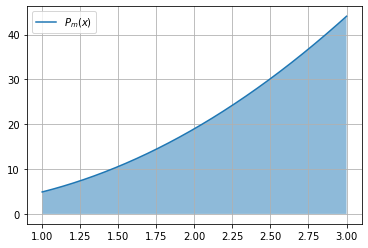

In [353]:
a, b = 1, 3
x_data = np.linspace(a, b, 1000)
plt.plot(x_data, Pm(x_data), label=f"$P_m(x)$")
plt.fill_between(x=x_data, y1=Pm(x_data), y2=0, alpha=0.5, linewidth=2)
plt.legend()
plt.grid()

Вычислим значение интеграла аналитически:
$$\int_1^3 (5.5 x^2 - 2.4 x + 1.8) dx = (\frac{11}{6} x^3 - 1.2 x^2 + 1.8 x )\big|_1^3 = \frac{125}{3} $$

#### Метод левых прямоугольников
$$S = h \sum_{i=0}^{N-1}f(x_i)$$
Значение остаточного члена для формулы левых прямоугольников:
$$R = \frac{M_1(b-a)}{2}h = M_1 h \qquad \text{где} \quad M_1 = \max_{x \in \left[a, b\right]}\left| f'(x)\right|$$

$$M_1 = \max_{x \in \left[a, b\right]}\left|11 x - 2.4\right| = 30.6$$

Получаем: $$R = M_1 h < \varepsilon \quad \Rightarrow \quad h < \frac{\varepsilon}{30.6}$$

In [354]:
I = 125 / 3

M1 = max(abs(11 * x_data - 2.4))
eps = 0.05
h = eps / M1
print("M1 = ", M1)
print("h = ", h)
print(int((b - a) / h) + 1)

M1 =  30.6
h =  0.0016339869281045752
1225


In [355]:
def I_left_rect(a, b, f, h):
    x_data = np.linspace(a, b, int((b - a) / h) + 1)
    return h * np.sum(f(x_data[:-1]))

In [356]:
start_time = time.time()
I_lrect = I_left_rect(a, b, Pm, h)
stop_time = time.time()
R_h = abs(I - I_lrect)
print("Значение интеграла по формуле левых прямоугольников: ", I_lrect)
print("Значение погрешности: ", R_h)
print("Время вычисления: ", stop_time - start_time)
print("Значение погрешности меньше эпсилон: ", "да" if R_h < eps else "нет")

Значение интеграла по формуле левых прямоугольников:  41.63464541771684
Значение погрешности:  0.03202124894982461
Время вычисления:  0.0
Значение погрешности меньше эпсилон:  да


#### Квадратурная формула Гаусса
$$\int_a^b f(x) dx \approx \frac{b-a}{2} \sum_{i=0}^{N} A_i f\left( \frac{a+b}{2} + \frac{b-a}{2} t_i \right)$$
Так как степень многочлена равна $2 = 2N+1 \quad \Rightarrow \quad N = 0.5 \quad \Rightarrow \quad N+1 = 1.5$, округляем в большую - $2$ узла для вычисления интеграла без погрешности.

Значения весов и узлов квадратурной формулы Гаусса: \
$t_0 = \frac{-1}{\sqrt{3}}$ \
$A_0 = 1$ \
$t_1 = \frac{1}{\sqrt{3}}$ \
$A_1 = 1$

In [357]:
def Gauss():
    t = [-np.sqrt(1/3), np.sqrt(1/3)]
    A = [1, 1]
    ab = (a + b) / 2
    ba = (b - a) / 2
    g = 0
    for i in range(2):
        x = ab + ba * t[i]
        g += A[i] * Pm(x)
    return ba * g

In [358]:
start_time = time.time()
I_Gauss = Gauss()
stop_time = time.time()
print("Значение интеграла по формуле Гаусса: ", I_Gauss)
print("Время вычисления: ", stop_time - start_time)

Значение интеграла по формуле Гаусса:  41.66666666666667
Время вычисления:  0.0


#### Формула Симпсона:
$$ S = \frac{h}{6} \left(f(x_0) + 4 \sum_{i=1}^{n} f(x_{i - \frac{1}{2}}) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n)\right) $$
Остаточный член:
$$ R = \frac{M_4 (b-a)}{2880} h^4 $$
Примечание:
$$ M_4 = \max_{x \in \left[a, b\right]}\left| f^{(4)}(x)\right| $$
Так как многочлен 2 степени, то 4 производная будет равна 0, соответственно остаточный член тоже равен 0, поэтому примем $ h = b-a, n = 1 $

In [359]:
def Simpson(a, b, f, h):
    s1, s2 = 0, 0
    n = round((b - a) / h) + 1
    x1 = np.arange(a, b+h/2, h)
    x2 = np.arange(a+h/2, b, h)
    print(x1, x2)
    for i in range(1, n-1):
        s1 += 2 * f(x1[i])
    for i in range(1, n):
        s2 += 4 * f(x2[i-1])
    s = (h/6) * (f(a) + s1 + s2 + f(b))
    return s

In [360]:
h = b - a # берем весь отрезок
start_time = time.time()
I_Simpson = Simpson(a, b, Pm, h)
stop_time = time.time()
R_h = abs(I - I_Simpson)
print("Значение интеграла по формуле Симпсона: ", I_Simpson)
print("Значение погрешности: ", R_h)
print("Время вычисления: ", stop_time - start_time)

[1. 3.] [2.]
Значение интеграла по формуле Симпсона:  41.666666666666664
Значение погрешности:  0.0
Время вычисления:  0.0


| Найденное точное значение интеграла<br>$$I = \frac{125}{3} = 41.(6)$$ | Число разбиений отрезка $n$<br>Шаг интегрирования $h$ | Значение интеграла, вычисленное по составной формуле $I^h$<br>Величина погрешности интеграла, вычисленного по составной формуле $R^h$ |
|----------------------------------------------------|-------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| Метод левых прямоугольников                        | $$n = 1225$$<br>$$h = 1.6*10^{-3}$$                      | $$I^h = 41.63464541771684$$<br>$$R^h = 0.03202124894982461$$                                                                              |
| Формула Симпсона                                      | $$n = 1$$<br>$$h = 2$$                                    | $$I^h = 41.(6)$$<br>$$R^h = 0$$                                                                                                            |
| Метод Гаусса                                       | Число узлов квадратуры: 2                             | $$I^G = 41.(6)$$                                                                                                             |

## Задача 5.2

Вычислить интеграл $I = \int_a^b f(x) dx$ с точностью $\varepsilon = 10^{-12}$  
$f(x) = \ln(x) \cos^2(2x)$  
$\left[a, b\right] = \left[7, 20\right]$

### ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ

1. Вычислить интеграл $I$ с помощью средств пакета Python.
2. Составить программу, содержащую следующие разделы:
    - процедуру-функцию, вычисляющую интеграл по составной квадратурной формуле из индивидуального варианта $I^h$ с заданным шагом h;
    - подпрограмму, вычисляющую значение интеграла с заданной точностью, оценку погрешности производить на основе правила Рунге*;
    - вычисление уточненного значения интеграла и величины погрешности.
3. Вычислить интеграл по программе и полученные данные свести в таблицу 5.2

Результатом работы программы должны быть следующие величины:  
$n$ - число разбиений отрезка интегрирования, при котором заданная точность достигнута;  
$I^h$ и $I^{h/2}$ - полученные значения интеграла при шагах $h$ и $\frac{h}{2}$ соответственно;  
$R^h = \left| I^h - I \right|$ и $R^{h/2} = \left| I^{h/2} - I \right|$ - величины абсолютных погрешностей;  
$I^{\text{уточн}}$ и $R^{\text{уточн}} = \left| I - I^{\text{уточн}} \right|$ - величины для уточненного значения интеграла.  

---------------------------------------------------------------------------------------------------------------------------
* **Правило Рунге**
$$I - I^{h/2} \approx \frac{I^{h/2} - I^{h}}{2^{p}-1}$$
* **Уточнение по Рунге**:
$$I \approx I^{h/2} + \frac{I^{h/2} - I^{h}}{2^{p}-1}$$

In [336]:
def f(x):
    return np.log(x) * np.cos(2 * x) ** 2

In [337]:
a, b = 7, 20
I, err = intgr.quad(f, a, b)
print("I = ", I)
print("abserr = ", err)

I =  16.212616240295606
abserr =  2.3632347058138748e-08


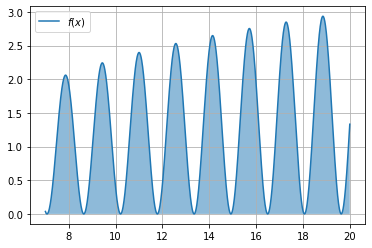

In [338]:
x_data = np.linspace(a, b, 1000)
plt.plot(x_data, f(x_data), label=f"$f(x)$")
plt.fill_between(x=x_data, y1=f(x_data), y2=0, alpha=0.5, linewidth=2)
plt.legend()
plt.grid()

In [339]:
def I_RungeErr(a, b, f, eps, p, Ifunc):
    n = 2
    h = (b - a) / n
    Ih = Ifunc(a, b, f, h)
    n *= 2
    h = (b - a) / n
    Ih2 = Ifunc(a, b, f, h)
    while(abs(Ih2 - Ih)/(2**p - 1) >= eps):
        n *= 2
        h = (b - a) / n
        Ih = Ih2
        Ih2 = Ifunc(a, b, f, h)
    return (Ih, Ih2, n) 

def Runge_clarify(Ih, Ih2, p):
    return Ih2 + (Ih2 - Ih) / (2**p - 1)

In [340]:
# Для Формулы Симпсона
eps = 1e-5
Ih, Ih2, n = I_RungeErr(a, b, f, eps, 4, Simpson)
I_clarified = Runge_clarify(Ih, Ih2, 4)
R_clarified = abs(I - I_clarified)
print("Ih = ", Ih)
print("Ih2 = ", Ih2)
print("n = ", n)
print("Rh = ", abs(I - Ih))
print("Rh2 = ", abs(I - Ih2))
print("I(уточн) =", I_clarified)
print("R(уточн) = ", R_clarified) 

Ih =  16.212546659632412
Ih2 =  16.21261195694005
n =  128
Rh =  6.95806631938467e-05
Rh2 =  4.2833555546906155e-06
I(уточн) = 16.212616310093892
R(уточн) =  6.979828626185736e-08


In [341]:
# Для формулы левых прямоугольников
eps = 1e-7
Ih, Ih2, n = I_RungeErr(a, b, f, eps, 1, I_left_rect)
I_clarified = Runge_clarify(Ih, Ih2, 1)
R_clarified = abs(I - I_clarified)
print("Ih = ", Ih)
print("Ih2 = ", Ih2)
print("n = ", n)
print("Rh = ", abs(I - Ih))
print("Rh2 = ", abs(I - Ih2))
print("I(уточн) =", I_clarified)
print("R(уточн) = ", R_clarified) 

Ih =  16.212616114754837
Ih2 =  16.212616177525287
n =  134217728
Rh =  1.255407688915966e-07
Rh2 =  6.277031872059524e-08
I(уточн) = 16.212616240295738
R(уточн) =  1.3145040611561853e-13


Провел небольшой эксперимент с точностью вычисления... По формуле Симпсона с точностью $10^{-10}$ программа не отработала даже за полчаса, а уж о точности $10^{-12}$ и говорить не приходится, там, наверное, сто лет ждать придется :) С точностью $10^{-7}$ программа отработала примерно за 5 минут.
Для формулы левых прямоугольников ситуация получше, при точности $10^{-7}$ программа отработала за несколько секунд, а вот при $10^{-8}$ выдала ошибку "Unable to allocate 8.00 GiB for an array with shape (1073741824,) and data type float64". Похоже, что у меня банально не хватило оперативной памяти!

|            **$$I = 16.212616240295606$$**            |      **Метод левых прямоугольников**     	|              **Метод Симпсона**              	|
|:---------------------------------------------------:	|:----------------------------------------:	|:-----------------------------------------:	|
|              Погрешность $\varepsilon$              	|            $1 \times 10^{-7}$            	|            $1 \times 10^{-7}$            	|
|             Число разбиений отрезка $n$             	|               $134217728$                 |                 $128$                	|
|                Значение интеграла $I$               	|        $$I^h = 16.212616114754837$$       |        $$I^h = 16.212546659632412$$        	|
|                 Величина погрешности                	|       $R^h =  1.26 \times 10^{-7}$       	|       $R^h =  6.95 \times 10^{-5}$       	|
|            Уточненное значение интеграла            	|  $I^{\text{уточн}} = 16.212616240295738$ 	|  $I^{\text{уточн}} = 16.212616310093892$ 	|
| Величина погрешности уточненного значения интеграла 	| $R^{\text{уточн}} = 1.31 \times 10^{-13}$ 	| $R^{\text{уточн}} = 6.98 \times 10^{-8}$ 	|